# Ejercicio 1. Una Primera Red Convolucional

In [1]:
import keras
keras.__version__

'2.4.3'

Vamos a comenzar mostrando una **Red Convolucional** muy simple para abordar el problema de clasificación MNIST que ya analizamos anteriormente. Con lo que hemos visto hasta ahora no resultará tan extraño, y más adelante detallaremos cada una de las capas que lo componen describiendo la funcionalidad que juegan en la red global. Veremos que, aunque la red convolucional que construiremos de forma directa es muy simple, supera el rendimiento de la red clásica que creamos en el notebook de la primera sesión.

![](https://github.com/miguelamda/DL/blob/master/5.%20Redes%20Convolucionales/imgs/CNN.png?raw=1)

![](https://lh3.googleusercontent.com/proxy/rEp3GBQOeWrNNRBjHCgzoRwlTO77-57ipNOOoR7NVUWOEEXJfngGfA79rjQGhrG99heiIBykR8o4gemJQR-HWPvImNFn6rm6qCM)

## 1. Construyendo una CNN

Como se puede observar en el siguiente código, esencialmente la red convolucional que vamos a usar está formada por dos capas convoluciones bidimensionales `layer_conv_2d` seguidas de dos capas max_pooling `layer_max_pooling_2d`. Finalmente, vendrá una tercera capa convolucional bidimensional.

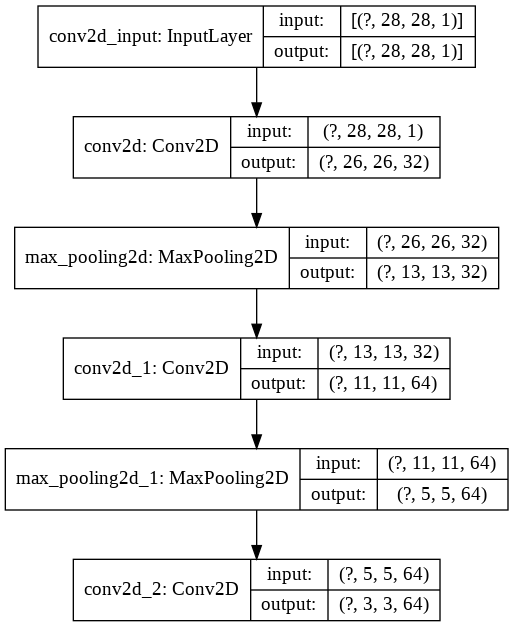

In [2]:
from keras import layers
from keras import models
from keras.utils.vis_utils import plot_model

CNN = models.Sequential()
CNN.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))
CNN.add(layers.MaxPooling2D((2, 2)))
CNN.add(layers.Conv2D(64, (3, 3), activation='relu'))

plot_model(CNN, to_file='CNN_plot.png', show_shapes=True, show_layer_names=True)

<!--Si la imagen del resumen de la arquitectura que hemos construido no se muestra, a continuación sí se visualiza:
![](https://github.com/miguelamda/DL/blob/master/5.%20Redes%20Convolucionales/imgs/CNN_plot.png?raw=1)-->

In [3]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


Una red convolucional toma como dato de entrada un tensor de la forma `(image_height, image_width, image_channels)`. En este caso, para ajustarse a las características de las imágenes de MNIST, será `(28, 28, 1)`, ya que usaremos un solo canal (gris) en las imágenes. Observa que el tamaño del dato de entrada se pasa como argumento de la primera capa con `input_shape = (28, 28, 1)`.

Cada capa de tipo `layer_conv_2d()` y `layer_max_pooling_2d()` dan como salida un tensor 3D de forma `(height, width, channels)`. Tanto la anchura como altura del tensor tienden a disminuir a medida que avanzamos en la red. El número de canales se controla por medio del primer argumento que se le pasa a las capas `layer_conv_2d()` (que en este caso es 32 o 64).

A continuación, hemos de pasar la salida de la última capa anterior (de tamaño `(3, 3, 64)`) a una red densa clasificadora similar a las que ya hemos visto en ejemplos anteriores. Como estas capas procesan vectores, que son 1D, y la entrada es un tensor 3D, hemos de aplanar el tensor por medio de la capa `layer_flatten()`, que también proporciona Keras:

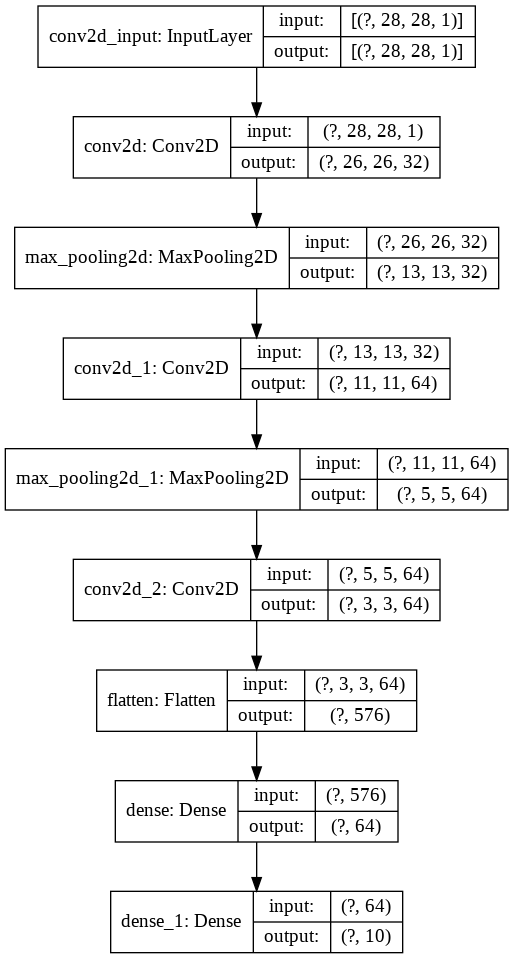

In [4]:
CNN.add(layers.Flatten())
CNN.add(layers.Dense(64, activation='relu'))
CNN.add(layers.Dense(10, activation='softmax'))

plot_model(CNN, to_file='CNN2_plot.png', show_shapes=True, show_layer_names=True)

Como el objetivo es calcular una clasificación en 10 clases, la última capa es una capa densa con 10 unidades y con salida `softmax`. La red completa queda por tanto:

<!--![](https://github.com/miguelamda/DL/blob/master/5.%20Redes%20Convolucionales/imgs/CNN2_plot.png?raw=1)-->

In [5]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

Una vez definida la red, realizamos el entrenamiento de forma similar a como hicimos en el modelo simple de MNIST:


In [6]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
CNN.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
CNN.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 49s 52ms/step - loss: 0.1736 - accuracy: 0.9446
Epoch 2/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0474 - accuracy: 0.9850
Epoch 3/5
938/938 [==============================] - 49s 53ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0249 - accuracy: 0.9923
Epoch 5/5
938/938 [==============================] - 49s 52ms/step - loss: 0.0195 - accuracy: 0.9940


Tras el entrenamiento podemos evaluar el modelo sobre los datos de test:


In [8]:
test_loss, test_acc = CNN.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.0270 - accuracy: 0.9920


In [9]:
test_acc

0.9919999837875366

Donde comprobamos que alcanzamos un accuracy de casi el 99%.

## 2. Ejercicio propuesto (para que no lo dejes aquí...)

Prueba a repetir el proceso con otro conjunto de datos similar, como es [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist), un dataset que pretende reemplazar MNIST como datos para analizar algoritmos de Machine Learning. Puedes ver como descargarlo [aquí](https://keras.io/api/datasets/fashion_mnist/).

![fashion-mnist](https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png)

## 3. Conclusiones

* Con redes convolucionales, podemos emplear capas bidimensionales para poder tratar con imágenes de forma natural, sin tener que aplanarlas, donde se pierde información.
* Requiere usar una capa flattern (aplanado) para poder pasar de la parte convolucional a la fully connected.
* Ahora cuesta más tiempo entrenar un modelo, al ser más profundo y porque la operación de convolución es más costosa. Es bueno por tanto solicitar una GPU.

## 4. Referencia

Libro de referencia empleado para este notebook: [Deep Learning with Python, F. Chollet](https://www.manning.com/books/deep-learning-with-python), y su [repositorio en GitHub](https://github.com/fchollet/deep-learning-with-python-notebooks)